# CDK Binding Affinity

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('..\data\BindingDB_col_cleaned.tsv', sep='\t') # loading of the cleaned data (CDKs selected and columns necessary for analysis selected)
df["BindingDB Ligand Name"].unique().size

4577

In [6]:
from sgt import SGT
import sgt


In [7]:
X = df['BindingDB Target Chain Sequence'].drop_duplicates()
def split(word): 
    return [char for char in word]
sequences = [split(x) for x in X]


In [8]:
sequences_df = pd.DataFrame({
    'id': range(1, len(sequences) + 1),  # Create IDs starting from 1
    'sequence': sequences  # Add the sequences
})

# Display the resulting DataFrame
sequences_df['sequence'] = sequences_df['sequence'].apply(
    lambda seq: [char.upper() for char in seq])
print(sequences_df)


    id                                           sequence
0    1  [M, E, D, Y, T, K, I, E, K, I, G, E, G, T, Y, ...
1    2  [M, E, N, F, Q, K, V, E, K, I, G, E, G, T, Y, ...
2    3  [M, E, D, Y, V, K, I, E, K, I, G, E, G, T, Y, ...
3    4  [M, A, T, S, R, Y, E, P, V, A, E, I, G, V, G, ...
4    5  [M, E, H, Q, L, L, C, C, E, V, E, T, I, R, R, ...
5    6  [M, E, H, Q, L, L, C, C, E, V, E, T, I, R, R, ...
6    7  [A, Q, P, P, P, A, Q, P, P, A, P, P, A, S, Q, ...
7    8  [M, G, T, V, L, S, L, S, P, S, Y, R, K, A, T, ...
8    9  [M, Y, H, N, S, S, Q, K, R, H, W, T, F, S, S, ...
9   10  [M, E, G, E, R, K, N, N, N, K, R, W, Y, F, T, ...
10  11  [S, V, N, E, V, P, D, Y, H, E, D, I, H, T, Y, ...
11  12  [M, G, D, E, K, D, S, W, K, V, K, T, L, D, E, ...
12  13  [M, G, D, E, K, D, S, W, K, V, K, T, L, D, E, ...
13  14  [M, D, Y, D, F, K, A, K, L, A, A, E, R, E, R, ...
14  15  [M, A, L, D, V, K, S, R, A, K, R, Y, E, K, L, ...
15  16  [M, D, Y, D, F, K, V, K, L, S, S, E, R, E, R, ...
16  17  [M, A,

In [9]:
from sklearn.decomposition import PCA
sgt = SGT(kappa = 1, lengthsensitive = False, flatten=True)
embedding = sgt.fit_transform(corpus=sequences_df)
embedding = embedding.drop(['id'], axis=1)

pca = PCA(n_components=2)
pca.fit(embedding)
X = pca.transform(embedding)
print(X)
print(np.sum(pca.explained_variance_ratio_))

[[ 1.64696866e-02  1.89771455e-02]
 [ 2.86473367e-02  3.84303246e-02]
 [ 1.59754049e-02  1.64247833e-02]
 [ 5.81024349e-02 -2.75361185e-02]
 [-4.29247010e-02 -1.11885621e-02]
 [-4.33309905e-02 -1.02127244e-02]
 [-5.60715713e-02 -1.33134767e-01]
 [-4.61329210e-02 -5.59457794e-02]
 [-4.21981647e-02 -3.74406686e-03]
 [-3.84389682e-02  1.49133486e-03]
 [-3.46929054e-02 -7.47032441e-03]
 [-3.38521864e-02  5.06145128e-03]
 [-3.52571106e-02  5.66880917e-03]
 [-3.15684028e-02  3.17503804e-03]
 [-2.48034447e-03 -6.50378636e-03]
 [-3.00664328e-02 -3.77805997e-05]
 [-1.66397172e-02 -2.97812735e-03]
 [ 1.08314364e-02  2.47937344e-02]
 [ 1.97442296e-02 -1.16408295e-02]
 [-1.05028746e-02 -1.94431620e-04]
 [-1.84186397e-02  1.07922160e-03]
 [-1.88795805e-02  5.15884035e-03]
 [-1.82408409e-02 -4.86573198e-03]
 [ 1.52052470e-02 -8.95784678e-03]
 [-3.79419039e-02 -4.81118641e-03]
 [ 2.12190051e-01 -8.49647346e-02]
 [ 2.92592755e-02  3.48540948e-02]
 [ 2.59188069e-02  3.46301227e-02]
 [ 2.47458897e-02  3

c:\Users\timon\anaconda3\envs\ada2\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(-0.15, 0.1)

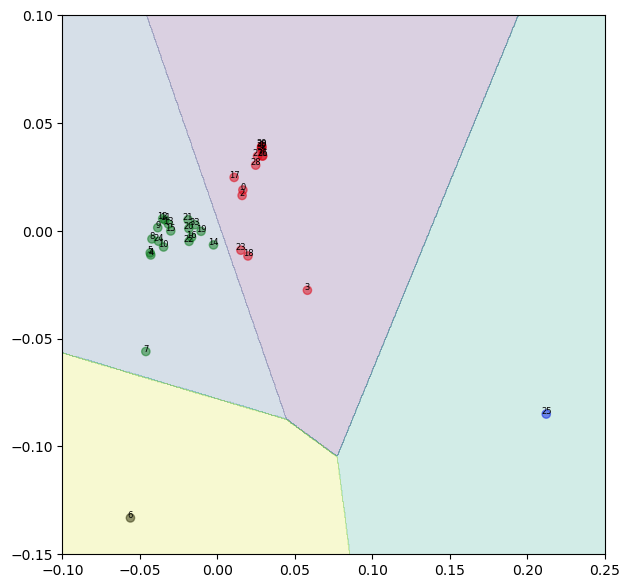

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter =3000)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(7, 7))
colmap = {1: 'r', 2: 'g', 3: 'b', 4:'k'}

colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(X[:,0], X[:,1], color=colors, alpha=0.5, edgecolor=colors)
for i, point in enumerate(X):
    plt.text(point[0], point[1], str(i), fontsize=6, ha='center')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 5000),
                     np.linspace(y_min, y_max, 5000))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict cluster for each grid point
Z = kmeans.predict(grid)
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.xlim(-0.1, 0.25)
plt.ylim(-0.15, 0.1)